# Week 06: Biological Neurons

In [1]:
import numpy as np
import scipy.integrate
import seaborn as sns
import importlib
import week06_funcs as w6f
importlib.reload(w6f)

<module 'week06_funcs' from 'C:\\Users\\Agonz\\Downloads\\EE5830\\week06\\week06_funcs.py'>

## FitzHugh-Nagumo model

$\frac{dv}{dt} = v - \frac{v^3}{3} - w + RI_{ext}$

$\tau\frac{dw}{dt} = v + a - bw$

In [2]:
def fhn_model(
    t: float, y: np.ndarray, 
    a: float, b: float, 
    tau: float, R: float,
    I: float
) -> np.ndarray:
    """
    FitzHugh-Nagumo Model ODE system.

    y[0] is v; y[1] is w.
    """
    v = y[0]
    w = y[1]
    dv_dt = v - (v**3)/3. - w + R*I
    dw_dt = (1./tau) * (v + a - b*w)
    return [dv_dt, dw_dt]

In [3]:
fhn_a = 0.7
fhn_b = 0.8
fhn_tau = 12.5
fhn_R = 1.0
fhn_I = 0.5

fhn_soln = scipy.integrate.solve_ivp(
    fun=fhn_model,
    t_span=(0, 200),
    y0=(0., 0.,),
    args=(fhn_a, fhn_b, fhn_tau, fhn_R, fhn_I)
)
    

In [4]:
fhn_soln

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-04 ...  1.996e+02  2.000e+02]
        y: [[ 0.000e+00  5.000e-05 ...  1.853e+00  1.844e+00]
            [ 0.000e+00  5.600e-06 ...  2.277e-01  2.982e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 1154
     njev: 0
      nlu: 0

<Axes: >

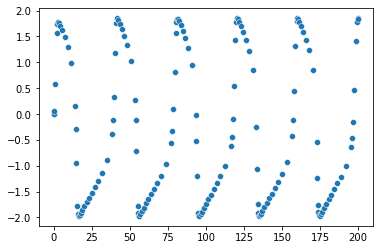

In [5]:
sns.scatterplot(x=fhn_soln.t, y=fhn_soln.y[0])

<Axes: >

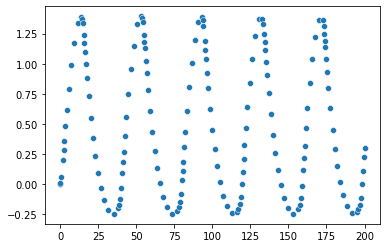

In [6]:
sns.scatterplot(x=fhn_soln.t, y=fhn_soln.y[1])

## Classical Hodgkin-Huxley Model

$$\displaystyle{C \frac{du}{dt} = -\sum_{channels}{I_{channels}(t)} + I_{ext}(t)}$$

$$\sum_{channels}{I_{channels}} = g_{Na}m^3h(u - E_{Na}) + g_K n^4 (u-E_K) + g_L (u -E_L)$$

$$\frac{dx}{dt} = -\frac{1}{\tau_x(u)}[x - x_0(u)]$$

$$x_0(u) = \frac{\alpha_x(u)}{\alpha_x(u) + \beta_x(u)}$$

$$\tau_x(u) = \frac{1}{\alpha_x(u) + \beta_x(u)}$$

Note: n, m, and h are state variables (represented by x) that are part of the ODE system.

In [123]:
hh_res = w6f.solve()

In [124]:
hh_res

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.792e-04 ...  1.936e+01  2.000e+01]
        y: [[-6.500e+01 -6.500e+01 ... -4.893e+01 -5.112e+01]
            [ 1.000e-01  9.999e-02 ...  7.917e-02  7.216e-02]
            [ 1.000e-02  1.009e-02 ...  2.672e-01  2.190e-01]
            [ 9.000e-01  9.000e-01 ...  1.557e-02  2.042e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 368
     njev: 12
      nlu: 43

<Axes: >

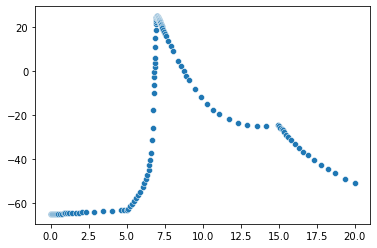

In [125]:
sns.scatterplot(x=hh_res.t, y=hh_res.y[0])

<Axes: >

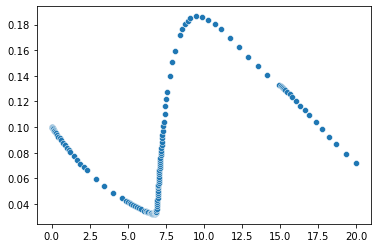

In [126]:
sns.scatterplot(x=hh_res.t, y=hh_res.y[1])

<Axes: >

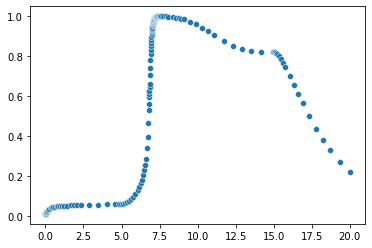

In [127]:
sns.scatterplot(x=hh_res.t, y=hh_res.y[2])

<Axes: >

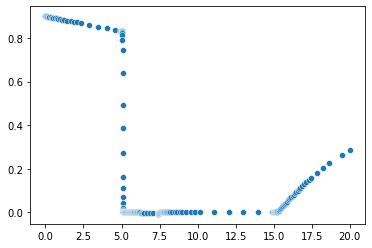

In [85]:
sns.scatterplot(x=hh_res.t, y=hh_res.y[3])

## 6. How does the classical HH neuron's output compare to the FitzHugh-Nagumo neuron's output?

The given Hodkin-Huxley neuron output does not fire until after the stimulus which can be seen by the 4 plots where the spike should occur right at 5ms but instead happens after. Furthermore, HH neuron's output does not repolarize where as the FitzHugh-Nagumo neuron's output does repolarize and has tonic firing.

## 7. What happens if you change $g_{Na}$ by making it smaller or bigger by an order of magnitude? What about the other conductances ($g_K$ and $g_L$)?

We see that when the $g_{Na}$ is made smaller the spike caused by the stimulus is also minimize, although the h-gate remains unchanged. When $g_{K}$ is minimized the h-gate changes whereas all other gates remain the same. When $g_{L}$ is minimized the neuron's output is pulled down rather than having a spike since the leak is too negative.

## 8. What happens if you change the amplitude of the current injected by making it smaller and larger? At what points does the neuron stop firing?

When the current is <= 0.1uA the neuron stops firing, whereas when the current is increased the neuron contains to fire until we get an error when solving for the output at 8000uA.